In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt


In [2]:
geoData = gpd.read_file('world.clean.json')
GW1 = pd.read_csv("GermanwatchCRI_2019.clean.csv", index_col=0)
GW2 = pd.read_csv("GermanwatchCRI_2000_2019.clean.csv", index_col=0)
pop = pd.read_csv('population.clean.csv', index_col=0)
gdp = pd.read_csv('gdp.clean.csv', index_col=0)

In [124]:
plotData = geoData.merge(pop, left_on=['Alpha‑3-code'], right_on=['Alpha‑3-code'])
plotData = plotData.merge(gdp, left_on=['Alpha‑3-code'], right_on=['Alpha‑3-code'])

for i in range(1960,2023):
    y = str(i)
    plotData['GDP_per_capita_'+y] = (plotData["WorldBank_"+y+"_GDP"]/plotData["WorldBank_"+y+"_POP"])
plotData = plotData.dropna(subset='GDP_per_capita_2021')


/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

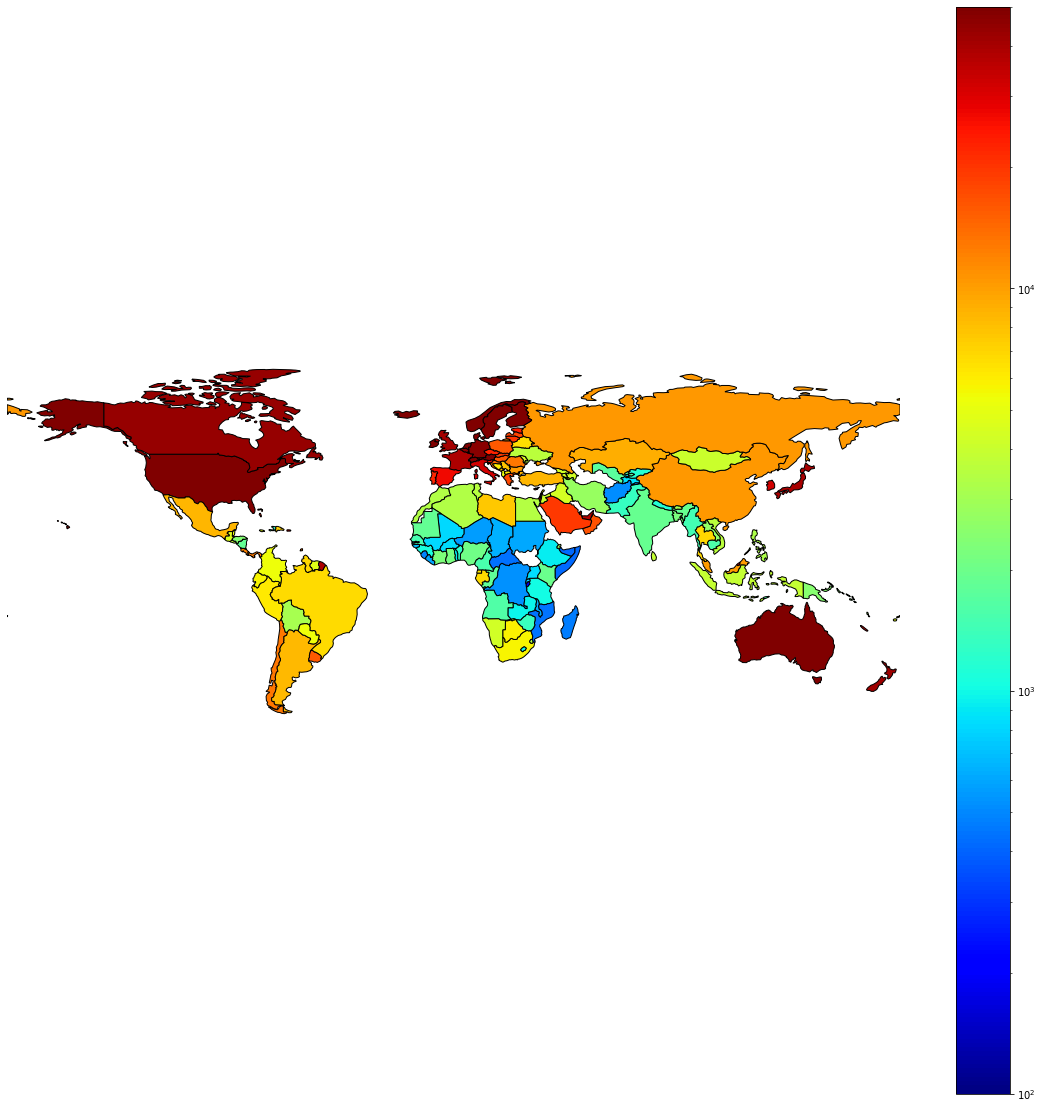

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors


y = 2020
gplt.choropleth(plotData, hue="GDP_per_capita_{}".format(y),  figsize=(20,20), legend=True, cmap="jet", norm=colors.LogNorm(vmin=100, vmax=50000))



In [126]:
emdat = pd.read_csv("emdat_public_2023_06_13.clean.csv")

/tmp/ipykernel_427637/2691670817.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  emdat = pd.read_csv("emdat_public_2023_06_13.clean.csv")


In [155]:
deaths = emdat[['Alpha‑3-code','EMDAT_Year','EMDAT_Total Deaths']].query("EMDAT_Year >= 2011 & EMDAT_Year <= 2021").drop(columns=['EMDAT_Year']).groupby("Alpha‑3-code").sum()

scatterData = plotData.merge(deaths, left_on=['Alpha‑3-code'], right_on=['Alpha‑3-code'])
scatterData['Deaths_per_capita'] = scatterData['EMDAT_Total Deaths']/scatterData['WorldBank_2021_POP']
scatterData = scatterData.dropna(subset='Deaths_per_capita')

regions = {key: val for key, val in zip(emdat['Alpha‑3-code'], emdat['EMDAT_Region'])} 
scatterData["Region"] = scatterData['Alpha‑3-code'].map(regions)

Raw PearsonRResult(statistic=-0.09060914715736455, pvalue=0.25753924156209423)
Logged PearsonRResult(statistic=-0.32553373340967384, pvalue=4.529876610528165e-05)


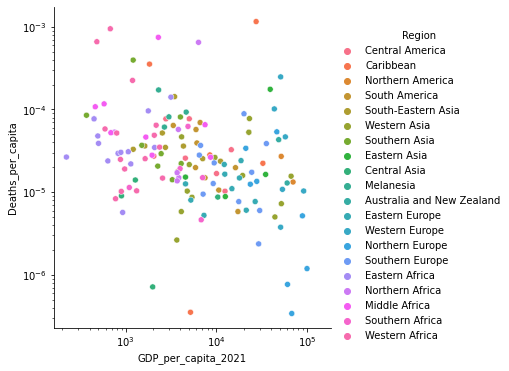

In [163]:
import seaborn as sns
sns.relplot(data=scatterData, x='GDP_per_capita_2021', y='Deaths_per_capita', hue='Region')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

from scipy.stats import pearsonr
import numpy as np
scatterData[['GDP_per_capita_2021', 'Deaths_per_capita']].corr()
sd = scatterData[['GDP_per_capita_2021','Deaths_per_capita']].to_numpy()
print( "Raw", pearsonr(sd[:,0], sd[:,1]) )
sd = np.log( sd[ (sd != 0).all(1) ] )
print( "Logged", pearsonr(sd[:,0], sd[:,1]) )


Raw PearsonRResult(statistic=-0.23323627659873786, pvalue=0.32235019566673906)
Logged PearsonRResult(statistic=-0.27634635917128725, pvalue=0.23822903408911392)


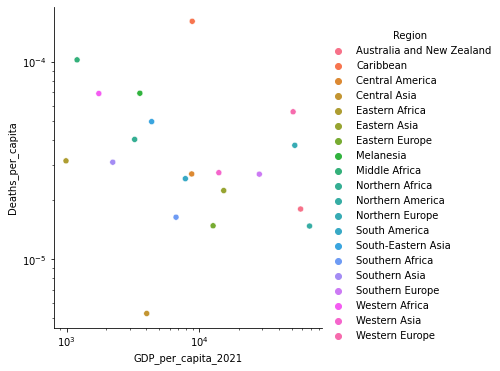

In [164]:
rscatterData = scatterData[['Region', 'EMDAT_Total Deaths', 'WorldBank_2021_GDP', 'WorldBank_2021_POP']].groupby("Region").sum()
rscatterData['Deaths_per_capita'] = rscatterData['EMDAT_Total Deaths']/rscatterData['WorldBank_2021_POP']
rscatterData['GDP_per_capita_2021'] = rscatterData['WorldBank_2021_GDP']/rscatterData['WorldBank_2021_POP']


sns.relplot(data=rscatterData, x='GDP_per_capita_2021', y='Deaths_per_capita', hue='Region')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

rscatterData[['GDP_per_capita_2021', 'Deaths_per_capita']].corr()
sd = rscatterData[['GDP_per_capita_2021','Deaths_per_capita']].to_numpy()
print( "Raw", pearsonr(sd[:,0], sd[:,1]) )
sd = np.log( sd[ (sd != 0).all(1) ] )
print( "Logged", pearsonr(sd[:,0], sd[:,1]) )
